In [3]:
import requests
from bs4 import BeautifulSoup

# Base URL up to the start parameter
base_url = 'https://www.prosportstransactions.com/baseball/Search/SearchResults.php?Player=&Team=&BeginDate=2020-02-20&EndDate=2024-11-01&DLChkBx=yes&InjuriesChkBx=yes&PersonalChkBx=yes&submit=Search&start='

# Store results in a list
all_injury_data = []

# Loop through the pages (assuming you know the total number of pages)
total_pages = 591  # Adjust this to the actual number of pages if known

for page in range(0, total_pages * 25, 25):  # Pagination increments by 25
    # Construct the URL for the current page
    url = f"{base_url}{page}"
    print(f"Scraping page {page // 25 + 1}: {url}")
    
    # Fetch the webpage
    response = requests.get(url)
    
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')
        
        # Find the table
        injury_results = soup.find("table", class_="datatable center")
        
        if injury_results:
            injury_notes = injury_results.find_all("tr", align="left")
            
            # Iterate over injury_notes to extract the data
            for note in injury_notes:
                columns = note.find_all("td")
                date = columns[0].text.strip()
                team = columns[1].text.strip()
                player = columns[3].text.strip()
                injury_detail = columns[4].text.strip()
                
                # Append data to the list
                all_injury_data.append({
                    "Date": date,
                    "Team": team,
                    "Player": player,
                    "Injury Detail": injury_detail
                })
        else:
            print(f"Table not found on page {page // 25 + 1}")
    else:
        print(f"Failed to retrieve page {page // 25 + 1}. Status code:", response.status_code)

# After the loop, all_injury_data contains data from all pages
print(f"Scraped {len(all_injury_data)} entries from {total_pages} pages.")


Scraping page 1: https://www.prosportstransactions.com/baseball/Search/SearchResults.php?Player=&Team=&BeginDate=2020-02-20&EndDate=2024-11-01&DLChkBx=yes&InjuriesChkBx=yes&PersonalChkBx=yes&submit=Search&start=0
Scraping page 2: https://www.prosportstransactions.com/baseball/Search/SearchResults.php?Player=&Team=&BeginDate=2020-02-20&EndDate=2024-11-01&DLChkBx=yes&InjuriesChkBx=yes&PersonalChkBx=yes&submit=Search&start=25
Scraping page 3: https://www.prosportstransactions.com/baseball/Search/SearchResults.php?Player=&Team=&BeginDate=2020-02-20&EndDate=2024-11-01&DLChkBx=yes&InjuriesChkBx=yes&PersonalChkBx=yes&submit=Search&start=50
Scraping page 4: https://www.prosportstransactions.com/baseball/Search/SearchResults.php?Player=&Team=&BeginDate=2020-02-20&EndDate=2024-11-01&DLChkBx=yes&InjuriesChkBx=yes&PersonalChkBx=yes&submit=Search&start=75
Scraping page 5: https://www.prosportstransactions.com/baseball/Search/SearchResults.php?Player=&Team=&BeginDate=2020-02-20&EndDate=2024-11-01&DL

In [7]:
import pandas as pd

# List of column names
column_names = ["Date", "Team", "Player", "Injury Detail"]

# Create the DataFrame
df = pd.DataFrame(all_injury_data, columns=column_names)

# Display the DataFrame to ensure it was created correctly
print(df.head())  # Show the first few rows

# Check the data types
print(df.dtypes)

# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])


         Date       Team            Player  \
0  2020-02-23    Red Sox  • Dustin Pedroia   
1  2020-02-27    Yankees   • Luis Severino   
2  2020-03-10     Giants   • Aramis Garcia   
3  2020-03-15  Blue Jays     • Yennsy Diaz   
4  2020-03-20     Padres    • Andres Munoz   

                                       Injury Detail  
0    placed on 60-day IL with left knee inflammation  
1  ligament replacement ("Tommy John") surgery on...  
2  placed on 60-day IL with labrum injury in righ...  
3  placed on 60-day IL with strained lat muscle i...  
4  ligament replacement ("Tommy John") surgery on...  
Date             object
Team             object
Player           object
Injury Detail    object
dtype: object


In [9]:
#Examine data type of each column
print(df.dtypes)

Date             datetime64[ns]
Team                     object
Player                   object
Injury Detail            object
dtype: object


In [11]:
# Display the first few rows of the DataFrame
print(df.head())

        Date       Team            Player  \
0 2020-02-23    Red Sox  • Dustin Pedroia   
1 2020-02-27    Yankees   • Luis Severino   
2 2020-03-10     Giants   • Aramis Garcia   
3 2020-03-15  Blue Jays     • Yennsy Diaz   
4 2020-03-20     Padres    • Andres Munoz   

                                       Injury Detail  
0    placed on 60-day IL with left knee inflammation  
1  ligament replacement ("Tommy John") surgery on...  
2  placed on 60-day IL with labrum injury in righ...  
3  placed on 60-day IL with strained lat muscle i...  
4  ligament replacement ("Tommy John") surgery on...  


In [13]:
# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Convert categorical columns to category type
df['Team'] = df['Team'].astype('category')
df['Player'] = df['Player'].astype('category')
df['Injury Detail'] = df['Injury Detail'].astype('category')

# Check the final data types
print(df.dtypes)

# Display the DataFrame to ensure everything looks correct
print(df.head())


Date             datetime64[ns]
Team                   category
Player                 category
Injury Detail          category
dtype: object
        Date       Team            Player  \
0 2020-02-23    Red Sox  • Dustin Pedroia   
1 2020-02-27    Yankees   • Luis Severino   
2 2020-03-10     Giants   • Aramis Garcia   
3 2020-03-15  Blue Jays     • Yennsy Diaz   
4 2020-03-20     Padres    • Andres Munoz   

                                       Injury Detail  
0    placed on 60-day IL with left knee inflammation  
1  ligament replacement ("Tommy John") surgery on...  
2  placed on 60-day IL with labrum injury in righ...  
3  placed on 60-day IL with strained lat muscle i...  
4  ligament replacement ("Tommy John") surgery on...  


In [15]:
import matplotlib.pyplot as plt

In [17]:
# 1. Time-Based Analysis

# a) Filtering by Date Range
df_filtered = df[df['Date'] >= '2020-03-01']
print("\nFiltered DataFrame (From March 2020 onwards):")
print(df_filtered)


Filtered DataFrame (From March 2020 onwards):
            Date       Team                       Player  \
2     2020-03-10     Giants              • Aramis Garcia   
3     2020-03-15  Blue Jays                • Yennsy Diaz   
4     2020-03-20     Padres               • Andres Munoz   
5     2020-03-20     Padres  • Reggie Lawson (Jefferson)   
6     2020-03-30    Red Sox                 • Chris Sale   
...          ...        ...                          ...   
14770 2024-08-26   Mariners                                
14771 2024-08-26    Marlins             • Xavier Edwards   
14772 2024-08-26    Orioles           • Ryan Mountcastle   
14773 2024-08-26   Phillies              • Jose Alvarado   
14774 2024-08-26   Phillies              • Weston Wilson   

                                           Injury Detail  
2      placed on 60-day IL with labrum injury in righ...  
3      placed on 60-day IL with strained lat muscle i...  
4      ligament replacement ("Tommy John") surgery on..

In [19]:
# b) Extracting Date Components
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
print("\nDataFrame with 'Month' and 'Year' columns added:")
print(df)


DataFrame with 'Month' and 'Year' columns added:
            Date       Team              Player  \
0     2020-02-23    Red Sox    • Dustin Pedroia   
1     2020-02-27    Yankees     • Luis Severino   
2     2020-03-10     Giants     • Aramis Garcia   
3     2020-03-15  Blue Jays       • Yennsy Diaz   
4     2020-03-20     Padres      • Andres Munoz   
...          ...        ...                 ...   
14770 2024-08-26   Mariners                       
14771 2024-08-26    Marlins    • Xavier Edwards   
14772 2024-08-26    Orioles  • Ryan Mountcastle   
14773 2024-08-26   Phillies     • Jose Alvarado   
14774 2024-08-26   Phillies     • Weston Wilson   

                                           Injury Detail  Month  Year  
0        placed on 60-day IL with left knee inflammation      2  2020  
1      ligament replacement ("Tommy John") surgery on...      2  2020  
2      placed on 60-day IL with labrum injury in righ...      3  2020  
3      placed on 60-day IL with strained lat musc

In [21]:
# c) Time Series Analysis - Group by Month
monthly_injuries = df.groupby(df['Date'].dt.to_period('M')).size()
print("\nMonthly Injuries Count:")
print(monthly_injuries)


Monthly Injuries Count:
Date
2020-02      2
2020-03      5
2020-05      2
2020-06     18
2020-07    283
2020-08    686
2020-09    670
2020-10    101
2020-11     47
2021-02     28
2021-03     42
2021-04    578
2021-05    707
2021-06    538
2021-07    598
2021-08    633
2021-09    615
2021-10    179
2021-11    167
2021-12      3
2022-03     54
2022-04    451
2022-05    630
2022-06    591
2022-07    544
2022-08    423
2022-09    432
2022-10    187
2022-11    157
2023-01      5
2023-02     22
2023-03    164
2023-04    378
2023-05    425
2023-06    454
2023-07    410
2023-08    453
2023-09    507
2023-10    140
2023-11    160
2023-12      5
2024-01      5
2024-02     41
2024-03    242
2024-04    397
2024-05    416
2024-06    492
2024-07    367
2024-08    321
Freq: M, dtype: int64


In [23]:
# 2. Categorical Data Analysis

# a) Counting Unique Values - Team Counts
team_counts = df['Team'].value_counts()
print("\nTeam Counts:")
print(team_counts)


Team Counts:
Team
Giants          653
Twins           639
Reds            615
Dodgers         592
Red Sox         588
Rays            581
Marlins         581
White Sox       552
Yankees         542
Mets            526
Cubs            526
Angels          493
Brewers         490
Pirates         484
Astros          480
Blue Jays       479
Cardinals       462
Phillies        459
Nationals       455
Orioles         455
Padres          454
Rangers         450
Royals          444
Rockies         440
Tigers          426
Athletics       421
Mariners        420
Braves          417
Diamondbacks    364
Guardians       172
Indians         115
Name: count, dtype: int64


In [25]:
# b) Group By Operations - Summarize Injuries by Team
team_summary = df.groupby('Team').size()
print("\nInjury Summary by Team:")
print(team_summary)



Injury Summary by Team:
Team
Angels          493
Astros          480
Athletics       421
Blue Jays       479
Braves          417
Brewers         490
Cardinals       462
Cubs            526
Diamondbacks    364
Dodgers         592
Giants          653
Guardians       172
Indians         115
Mariners        420
Marlins         581
Mets            526
Nationals       455
Orioles         455
Padres          454
Phillies        459
Pirates         484
Rangers         450
Rays            581
Red Sox         588
Reds            615
Rockies         440
Royals          444
Tigers          426
Twins           639
White Sox       552
Yankees         542
dtype: int64


C:\Users\Lmoya\AppData\Local\Temp\ipykernel_17968\2103201853.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  team_summary = df.groupby('Team').size()


In [27]:
# 3. Memory Usage Check
print("\nMemory Usage After Conversion:")
print(df.memory_usage(deep=True))


Memory Usage After Conversion:
Index               132
Date             118200
Team              17829
Player           335487
Injury Detail    383312
Month             59100
Year              59100
dtype: int64



Plotting Injuries Over Time:


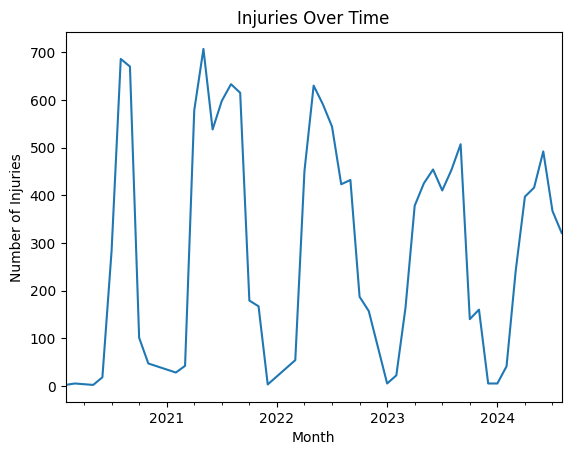

In [29]:
# 4. Data Visualization

# a) Plotting Injuries Over Time
print("\nPlotting Injuries Over Time:")
monthly_injuries.plot(kind='line')
plt.title('Injuries Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Injuries')
plt.show()


Bar Plot of Injuries by Team:


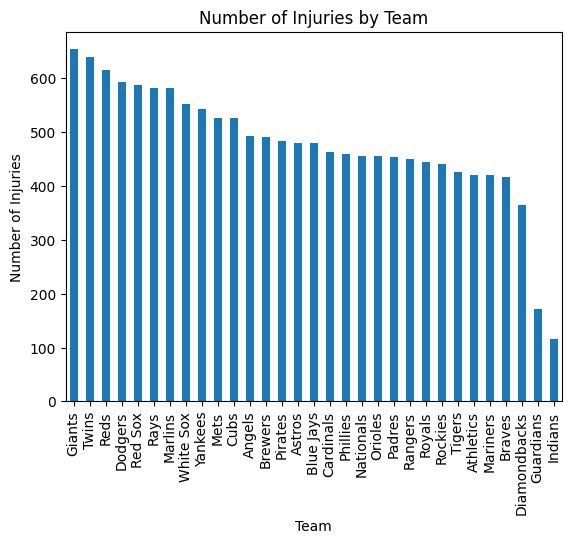

In [31]:
# b) Bar Plot of Injuries by Team
print("\nBar Plot of Injuries by Team:")
df['Team'].value_counts().plot(kind='bar')
plt.title('Number of Injuries by Team')
plt.xlabel('Team')
plt.ylabel('Number of Injuries')
plt.show()

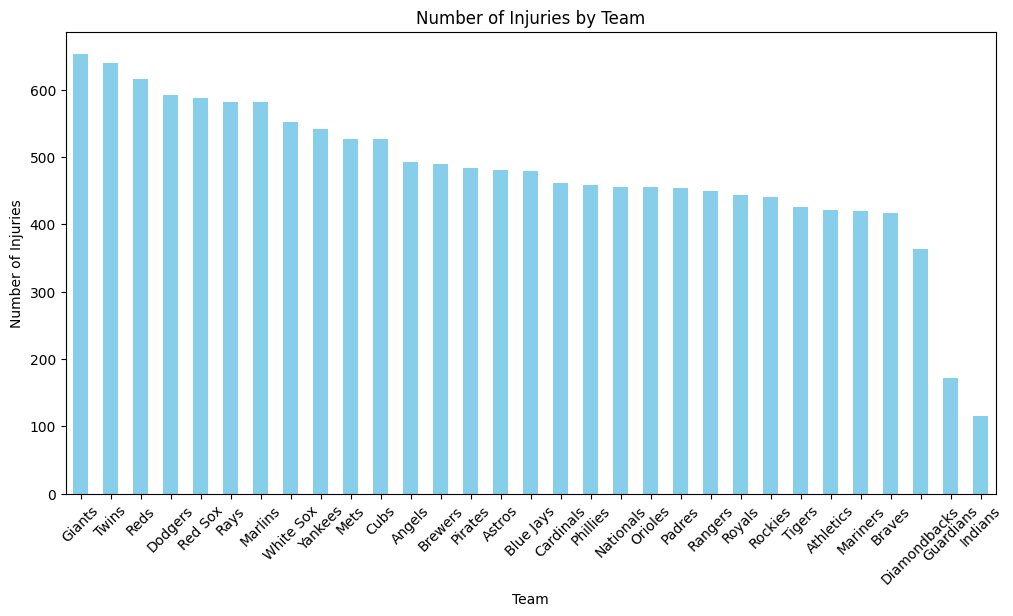

In [33]:
# Count the number of injuries per team
injury_count_by_team = df['Team'].value_counts()

# Plotting the injury count by team
plt.figure(figsize=(12, 6))
injury_count_by_team.plot(kind='bar', color='skyblue')
plt.title('Number of Injuries by Team')
plt.xlabel('Team')
plt.ylabel('Number of Injuries')
plt.xticks(rotation=45)
plt.show()

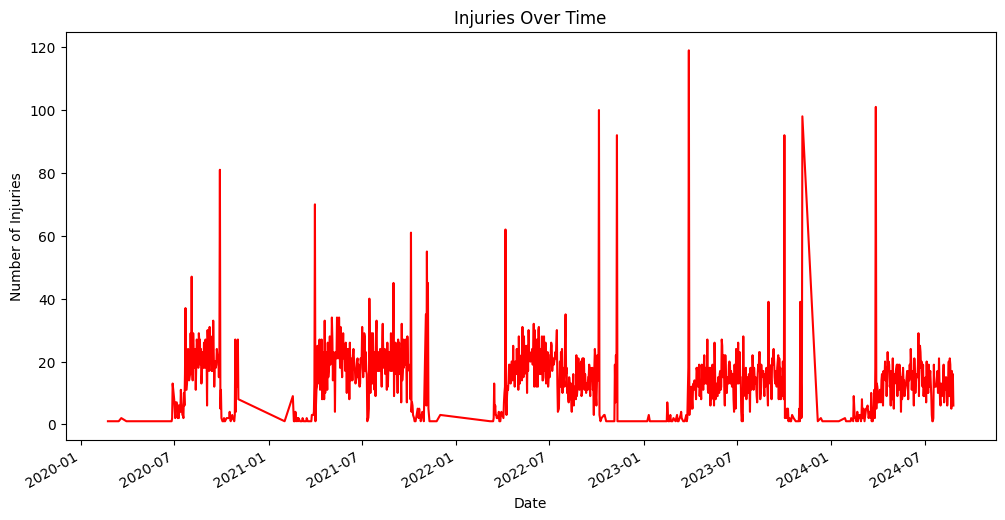

In [35]:
# Group by Date and count the number of injuries per day
injuries_over_time = df.groupby('Date').size()

# Plotting injuries over time
plt.figure(figsize=(12, 6))
injuries_over_time.plot(kind='line', color='red')
plt.title('Injuries Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Injuries')
plt.show()


In [37]:
# Example: Count specific types of injuries
tommy_john_injuries = df[df['Injury Detail'].str.contains('Tommy John', case=False, na=False)]
labrum_injuries = df[df['Injury Detail'].str.contains('labrum', case=False, na=False)]

print(f"Number of Tommy John surgeries: {len(tommy_john_injuries)}")
print(f"Number of labrum injuries: {len(labrum_injuries)}")


Number of Tommy John surgeries: 274
Number of labrum injuries: 26


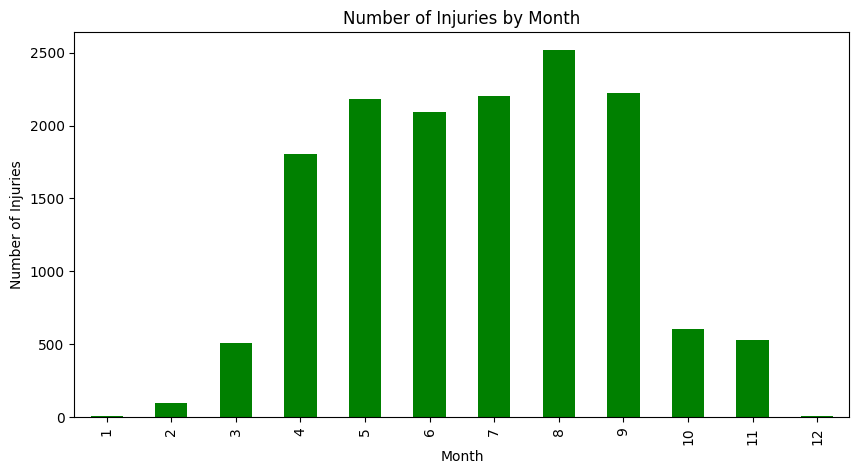

In [39]:
# Add a Month column if not already present
df['Month'] = df['Date'].dt.month

# Group by month and count injuries
injuries_by_month = df['Month'].value_counts().sort_index()

# Plotting injuries by month
plt.figure(figsize=(10, 5))
injuries_by_month.plot(kind='bar', color='green')
plt.title('Number of Injuries by Month')
plt.xlabel('Month')
plt.ylabel('Number of Injuries')
plt.show()


In [41]:
# Specify the filename
filename = 'injury_data.csv'

# Write the DataFrame to a CSV file
df.to_csv(filename, index=False)

print(f"DataFrame successfully written to {filename}")

DataFrame successfully written to injury_data.csv
